INSTRUCTIONS

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [150]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [151]:
os.chdir('/Users/celina/Desktop/Python')

In [152]:
df = pd.read_table('sentiment labelled sentences/imdb_labelled.txt', sep='\t', names=('Sentiment', 'Score'))
df.head()

,Sentiment,Score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [153]:
good_keywords = ['good', 'greatest', 'adorable', 'gem', 'funny', 'best','cool', 'perfect', 'great', 'high', 'love', 
                 'brillian', 'masterpiece', 'high', 'number one', 'rock', '10',
                'succeed', 'glad', 'happy', 'cute', 'convinc', 'rivet', 'enjoy', 'star', 
                 'resound', 'success', 'lik', 'amaz', 'thought-provoking', 'decent', 'funny', 'touching', 
                'terrific', 'uplifting', 'fresh', 'bold', 'applause', 'nice', 'better', 'worth']

In [154]:
for key in good_keywords:
    df[str(key)] = df.Sentiment.str.contains(
        ' ' + str(key),
        case=False
    )

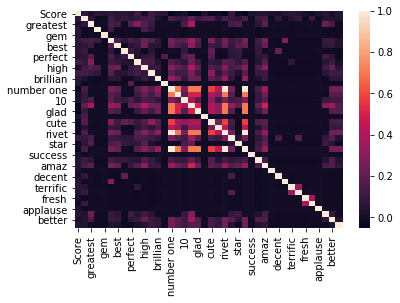

In [155]:
sns.heatmap(df.corr())

In [156]:
data = df[good_keywords]
target = df['Score']

In [157]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 249


Challenge: Iterate and evaluate your classifier

- Do any of your classifiers seem to overfit?
- Which seem to perform the best? Why?
- Which features seemed to be most impactful to performance?

In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)
#the confusion matrix below shows that 204 errors result from not identifying a good review; 45 are false positives

array([[317,  45],
       [204, 182]])

In [160]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [161]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.6
Testing on Sample: 0.6671122994652406


In [162]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.67105263, 0.60526316, 0.65333333, 0.72      , 0.65333333,
       0.66666667, 0.67567568, 0.58108108, 0.63513514, 0.56756757])

Although there is some variation in the cross-validation output, all accuracy estimates are pretty close to one another. Therefore, although the model 